In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [29]:
train.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [30]:
test.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   date       1080 non-null   object 
 2   city       1080 non-null   object 
 3   lat        1072 non-null   float64
 4   long       1067 non-null   float64
 5   pop        1080 non-null   int64  
 6   shop       1080 non-null   object 
 7   brand      1080 non-null   object 
 8   container  1077 non-null   object 
 9   capacity   1076 non-null   object 
 10  price      1080 non-null   float64
 11  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.4+ KB


In [33]:
train.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


In [34]:
test.describe()

,id,lat,long,pop,price,quantity
count,1080.00000,1072.000000,1067.000000,1080.000000,1080.000000,1080.000000
mean,7019.50000,38.298228,23.269862,355370.166667,1.238454,29360.875926
std,311.91345,1.655656,1.088977,230207.452873,0.829449,16182.538761
min,6480.00000,35.327870,21.734440,137154.000000,0.230000,3523.000000
25%,6749.75000,37.962450,22.417610,144651.000000,0.650000,17229.750000
50%,7019.50000,38.244440,22.930860,261162.000000,0.980000,26010.500000
75%,7289.25000,39.636890,23.716220,664046.000000,1.555000,37421.750000
max,7559.00000,40.643610,25.143410,664046.000000,4.790000,116612.000000


In [35]:
# All values after row 6479 are NaN.
train  = train.drop(train.index[6480:])
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0
6479,6479.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,adult-cola,glass,500ml,1.16,30413.0


In [36]:
pd.DataFrame(train.groupby(['brand', 'container'], axis =0, as_index=True).count()['id'])

id
brand        container     
adult-cola   can        430
             glass      432
             plastic    432
gazoza       can        431
             glass      429
             plastic    431
kinder-cola  can        431
             glass      431
             plastic    432
lemon-boost  can        431
             glass      432
             plastic    431
orange-power can        430
             glass      430
             plastic    431

In [37]:
#There are multiple brands, but for this task, we will only forcus on the Gazoza brand.

In [38]:
gazoza = train[train['brand'] == 'gazoza'].reset_index(drop=True)

In [39]:
gazoza

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,7.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,glass,500ml,0.49,44734.0
1,17.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,glass,500ml,0.58,41378.0
2,18.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,plastic,1.5lt,1.00,30757.0
3,19.0,31/01/12,Irakleion,35.32787,25.14341,134219.0,shop_2,gazoza,can,330ml,0.26,49688.0
4,31.0,31/01/12,Patra,38.24444,21.73444,164250.0,shop_6,gazoza,glass,500ml,0.57,56428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,6456.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,glass,500ml,0.70,38691.0
1292,6457.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,can,330ml,0.36,33818.0
1293,6467.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,plastic,1.5lt,1.48,28441.0
1294,6473.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,gazoza,plastic,1.5lt,0.26,46047.0


In [40]:
gazoza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1296 non-null   float64
 1   date       1296 non-null   object 
 2   city       1296 non-null   object 
 3   lat        1285 non-null   float64
 4   long       1292 non-null   float64
 5   pop        1296 non-null   float64
 6   shop       1296 non-null   object 
 7   brand      1296 non-null   object 
 8   container  1291 non-null   object 
 9   capacity   1293 non-null   object 
 10  price      1296 non-null   float64
 11  quantity   1296 non-null   float64
dtypes: float64(6), object(6)
memory usage: 121.6+ KB


In [41]:
#Clean up the data

In [42]:
gazoza[gazoza['container'].isna()]
# These are the values where the container column had null vlaues

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
340,1694.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,NaN,330ml,0.36,37603.0
798,3995.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,NaN,500ml,0.73,53633.0
984,4927.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,NaN,500ml,0.64,46809.0
1214,6074.0,31/08/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,NaN,1.5lt,1.38,35339.0
1229,6155.0,30/09/17,Patra,38.24444,21.73444,168501.0,shop_6,gazoza,NaN,500ml,0.65,76651.0


In [43]:
# Print all the values for the said dates and cities to see which container types are missing
gazoza[((gazoza['date'] == '31/07/13') & (gazoza['city'] == 'Larisa')) |
       ((gazoza['date'] == '30/09/15') & (gazoza['city'] == 'Patra')) |
       ((gazoza['date'] == '31/07/16') & (gazoza['city'] == 'Larisa')) |
       ((gazoza['date'] == '31/08/17') & (gazoza['city'] == 'Thessaloniki')) |
       ((gazoza['date'] == '30/09/17') & (gazoza['city'] == 'Patra'))]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
338,1692.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,glass,500ml,0.61,44319.0
339,1693.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,plastic,1.5lt,0.95,40513.0
340,1694.0,31/07/13,Larisa,39.63689,22.41761,139242.0,shop_5,gazoza,NaN,330ml,0.36,37603.0
798,3995.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,NaN,500ml,0.73,53633.0
799,3996.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,plastic,1.5lt,1.04,54058.0
800,3997.0,30/09/15,Patra,38.24444,21.73444,167001.0,shop_6,gazoza,can,330ml,0.37,71289.0
984,4927.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,NaN,500ml,0.64,46809.0
985,4928.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,can,330ml,0.27,59206.0
988,4946.0,31/07/16,Larisa,39.63689,22.41761,142030.0,shop_5,gazoza,plastic,1.5lt,1.26,31209.0
1213,6073.0,31/08/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,glass,500ml,0.71,60026.0


In [45]:
# Fill in the missing contiainer types
gazoza.at[340, 'container'] = 'can'
gazoza.at[798, 'container'] = 'glass'
gazoza.at[984, 'container'] = 'glass'
gazoza.at[1214, 'container'] = 'plastic'
gazoza.at[1229, 'container'] = 'glass'

In [47]:
# No missing container types anymore
gazoza[gazoza['container'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity


In [48]:
# Check the missing capacity values
gazoza[gazoza['capacity'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
368,1847.0,30/09/13,Thessaloniki,40.64361,22.93086,347001.0,shop_4,gazoza,plastic,NaN,0.93,42320.0
648,3246.0,31/01/15,Athens,37.97945,23.71622,667237.0,shop_1,gazoza,glass,NaN,0.51,46809.0
962,4812.0,30/06/16,Thessaloniki,40.64361,22.93086,351702.0,shop_4,gazoza,glass,NaN,0.77,40645.0


In [49]:
# Fill in the missing capacity types
gazoza.at[368, 'capacity'] = '1.5lt'
gazoza.at[648, 'capacity'] = '500ml'
gazoza.at[962, 'capacity'] = '500ml'

In [50]:
# No more missing capacity values
gazoza[gazoza['capacity'].isna()]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity


In [24]:
#Clean the test data.

In [52]:
gazoza_test = test[test['brand'] == 'gazoza'].reset_index(drop=True)
gazoza_test.drop(['id','lat','long','brand'], axis=1, inplace=True)
gazoza_test['date'] = pd.to_datetime(gazoza_test['date'])
gazoza_test.head()

,date,city,pop,shop,container,capacity,price,quantity
0,2018-01-31,Athens,664046,shop_1,glass,500ml,0.77,24297
1,2018-01-31,Athens,664046,shop_1,plastic,1.5lt,1.22,21295
2,2018-01-31,Athens,664046,shop_1,can,330ml,0.28,38107
3,2018-01-31,Irakleion,137154,shop_2,plastic,1.5lt,1.27,26491
4,2018-01-31,Patra,168034,shop_6,plastic,1.5lt,1.43,25790


In [53]:
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       216 non-null    datetime64[ns]
 1   city       216 non-null    object        
 2   pop        216 non-null    int64         
 3   shop       216 non-null    object        
 4   container  216 non-null    object        
 5   capacity   214 non-null    object        
 6   price      216 non-null    float64       
 7   quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 13.6+ KB


In [54]:
# Check the missing capacity values
gazoza_test[gazoza_test['capacity'].isna()]

,date,city,pop,shop,container,capacity,price,quantity
208,2018-12-31,Thessaloniki,354290,shop_4,can,NaN,0.39,54365
209,2018-12-31,Athens,664046,shop_3,glass,NaN,0.57,33174


In [55]:
gazoza_test.at[208, 'capacity'] = '330ml'
gazoza_test.at[209, 'capacity'] = '500ml'

In [59]:
# @title Default title text
#Choose features to keep
#As we can see below, the factors 'lat', 'long', and 'shop' are practically replecating the same information. So we can reduce the dimentionality of the data by keeping only one them.

In [60]:
pd.DataFrame(gazoza.groupby(['city', 'lat', 'long', 'shop'], axis =0, as_index=True).count()['id'])

id
city         lat      long     shop       
Athens       37.96245 23.68708 shop_3  214
             37.97945 23.71622 shop_1  215
Irakleion    35.32787 25.14341 shop_2  214
Larisa       39.63689 22.41761 shop_5  214
Patra        38.24444 21.73444 shop_6  212
Thessaloniki 40.64361 22.93086 shop_4  214

In [62]:
#Since the feature 'shop' has no missing values, we'll drop 'lat', 'long'.

#We will also drop the brand column since all of them are just 'gazoza'.

#The 'id' does not add any value too.

In [63]:
# Drop some columns
gazoza.drop(['id','lat','long','brand'], axis=1, inplace=True)

In [64]:
# Change date column to date type
gazoza['date'] = pd.to_datetime(gazoza['date'])

In [65]:
gazoza.head()

,date,city,pop,shop,container,capacity,price,quantity
0,2012-01-31,Athens,672130.0,shop_1,glass,500ml,0.49,44734.0
1,2012-01-31,Irakleion,134219.0,shop_2,glass,500ml,0.58,41378.0
2,2012-01-31,Irakleion,134219.0,shop_2,plastic,1.5lt,1.00,30757.0
3,2012-01-31,Irakleion,134219.0,shop_2,can,330ml,0.26,49688.0
4,2012-01-31,Patra,164250.0,shop_6,glass,500ml,0.57,56428.0


In [66]:
#Exploratory Data Analysis

Text(0.5, 1.0, 'Quantity Sold Over Time')

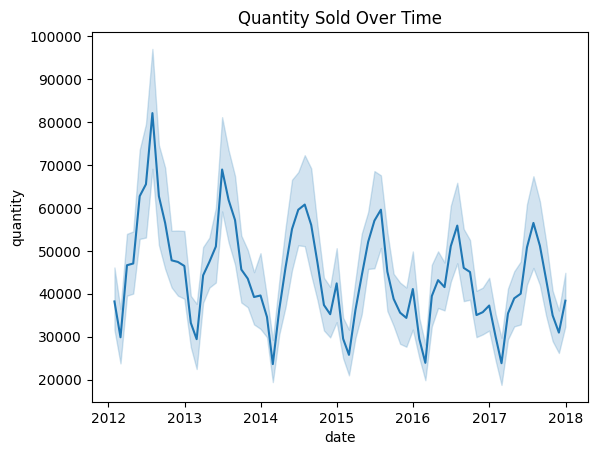

In [67]:
sns.lineplot(x=gazoza['date'], y=gazoza['quantity']).set_title('Quantity Sold Over Time')

In [68]:
#The quantity sold looks very seasonal. Although the sales are gradually decreasing over time, there are persistent peaks and troughs that appear year after year.

Text(0.5, 1.0, 'Quantity Sold vs. Population')

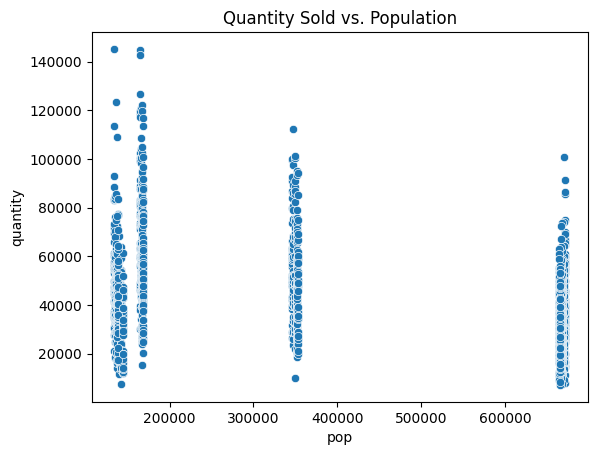

In [69]:
sns.scatterplot(x=gazoza['pop'], y=gazoza['quantity']).set_title('Quantity Sold vs. Population')

In [70]:
#The scatter plot of the quantity sold vs population does not seen to yield much information.

Text(0.5, 1.0, 'Population by City')

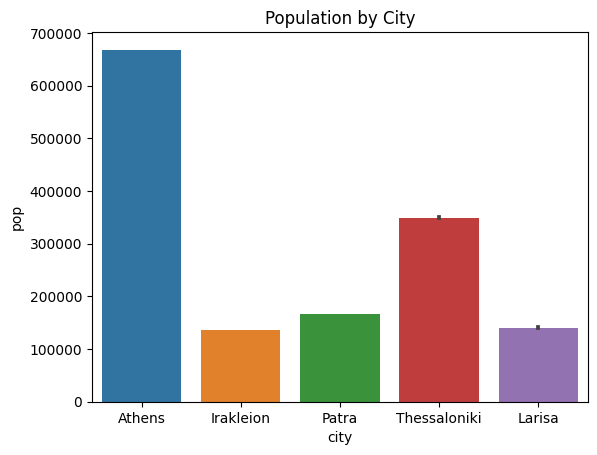

In [71]:
sns.barplot(x=gazoza['city'], y=gazoza['pop']).set_title('Population by City')

In [72]:
#We see that the population between the different cities is very different. So separating the poplations by city may help us see some patterns.

#Let's see examine the data from Athens.

Text(0.5, 1.0, 'Athens Population Over Time')

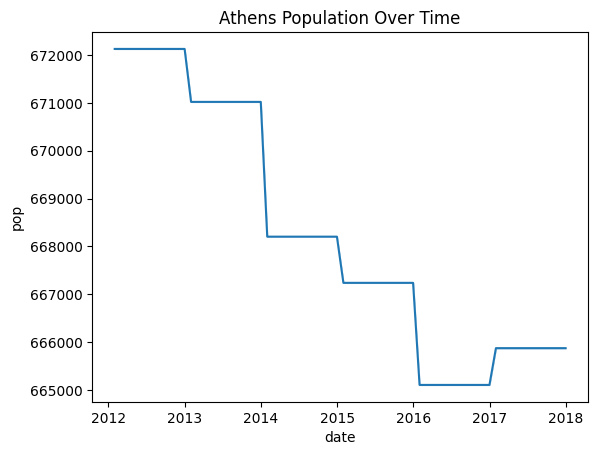

In [73]:
athens_gazoza = gazoza[gazoza['city'] == 'Athens']
sns.lineplot(x=athens_gazoza['date'], y=athens_gazoza['pop']).set_title('Athens Population Over Time')

In [74]:
#We can see that the population of Athens has been decreasing over the years.

#Let's see how to population related to the sales.

Text(0.5, 1.0, 'Quantity Sold vs. Athens Population')

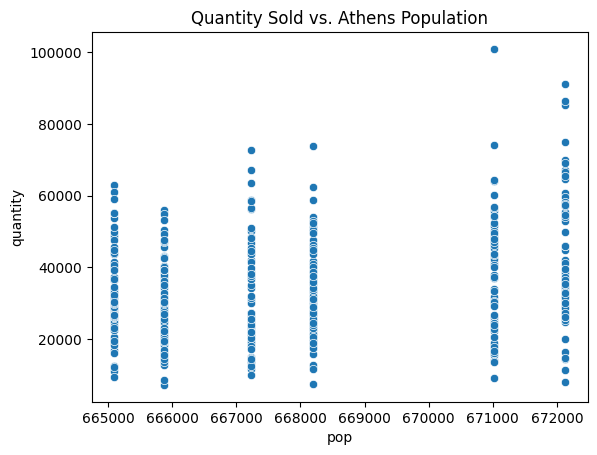

In [75]:
sns.scatterplot(x=athens_gazoza['pop'], y=athens_gazoza['quantity']).set_title('Quantity Sold vs. Athens Population')

In [76]:
#The quantities sold seem to have a higher variance with high population numbers.

Text(0.5, 1.0, 'Athens Quantity Over Time')

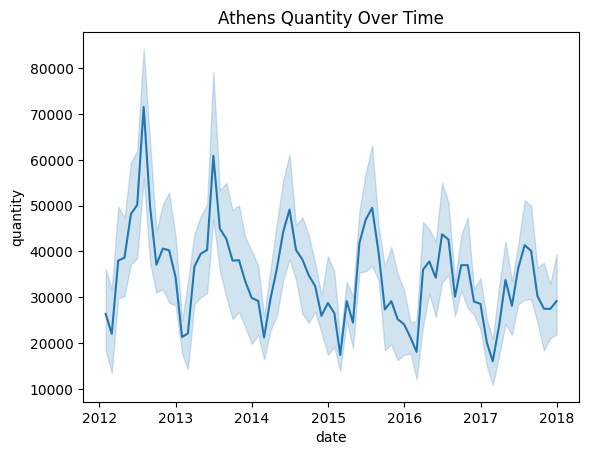

In [77]:
sns.lineplot(x=athens_gazoza['date'], y=athens_gazoza['quantity']).set_title('Athens Quantity Over Time')

In [78]:
#The quantity sold in Athens also looks seasonal. The sales have been decreasing over time, but the the peaks are still consistent. The decrease in quantities sold could be related to population decrease.

Text(0.5, 1.0, 'Comparing the Sales in Different Shops')

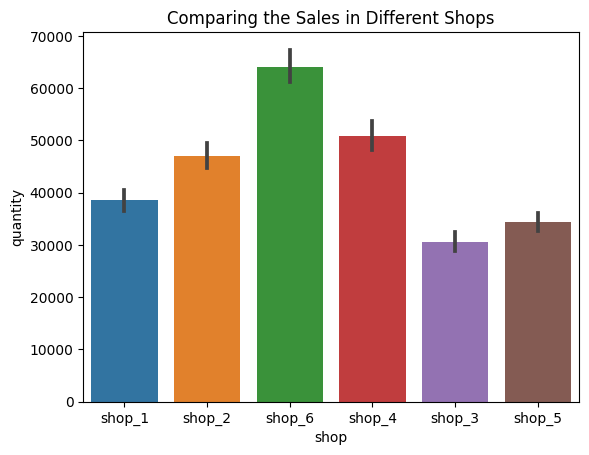

In [79]:
sns.barplot(x=gazoza['shop'], y=gazoza['quantity']).set_title('Comparing the Sales in Different Shops')

# Athens - shop_3
#        - shop_1
# Irakleion - shop_2
# Larisa - shop_5
# Patra - shop_6
# Thessaloniki - shop_4

Text(0.5, 1.0, 'Quantity Sold in Each City by Container Type')

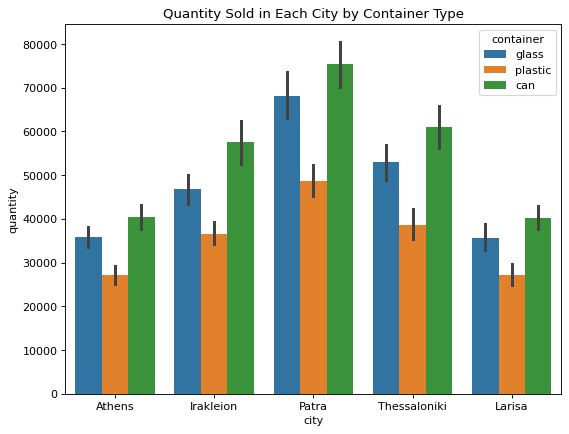

In [80]:
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(x=gazoza['city'], y=gazoza['quantity'], hue = gazoza['container']).set_title('Quantity Sold in Each City by Container Type')

In [81]:
#In all cities, we see that the can is the highest selling container type and the plastic is the lowest selling container type.

Text(0.5, 1.0, 'Quantity Sold vs Price')

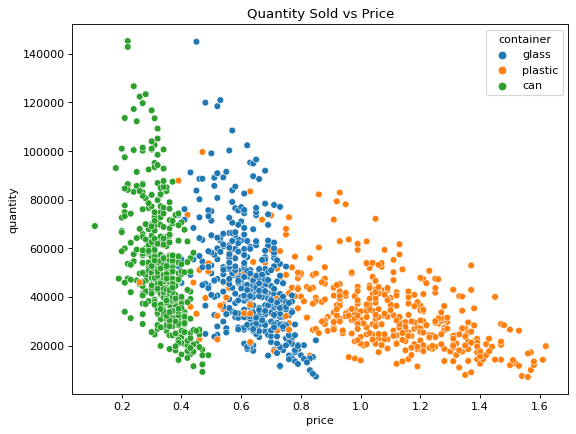

In [82]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=gazoza['price'], y=gazoza['quantity'], hue=gazoza['container']).set_title('Quantity Sold vs Price')

In [83]:
#We can notice a generally negative relationship between the price and quantity.

Text(0.5, 1.0, 'Gazoza Price over Time by Container Type')

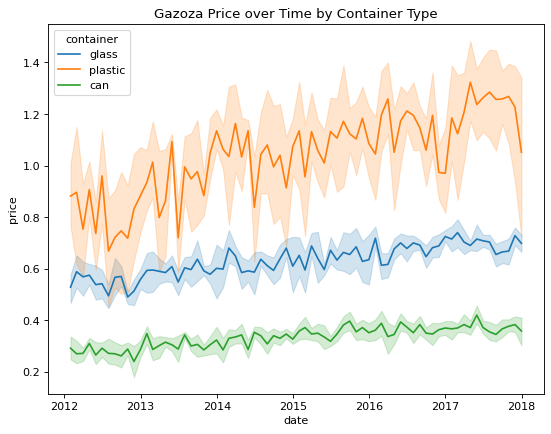

In [84]:
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=gazoza, x='date', y='price', hue='container').set_title('Gazoza Price over Time by Container Type')

In [85]:
#Train-Test Preparation¶

In [86]:
# Assign Train and Test split.
X_train = gazoza.loc[:,gazoza.columns != 'quantity']
X_test = gazoza_test.loc[:,gazoza_test.columns != 'quantity']
y_train = gazoza.loc[:,gazoza.columns == 'quantity']
y_test = gazoza_test.loc[:,gazoza_test.columns == 'quantity']

In [87]:
# Split the date feature into year, month and date

X_train['year'] = X_train['date'].apply(lambda d : d.year)
X_train['month'] = X_train['date'].apply(lambda d : d.month)
X_train['day'] = X_train['date'].apply(lambda d : d.day)


X_test['year'] = X_test['date'].apply(lambda d : d.year)
X_test['month'] = X_test['date'].apply(lambda d : d.month)
X_test['day'] = X_test['date'].apply(lambda d : d.day)

In [88]:
# Drop the date feature
X_train.drop('date', axis=1, inplace=True)
X_test.drop('date', axis=1, inplace=True)

In [89]:
# Remove the sufix of the values of the capacity column
X_train['capacity'] = X_train['capacity'].map(lambda x: str(x)[:-2])
X_test['capacity'] = X_test['capacity'].map(lambda x: str(x)[:-2])

# Change the capacity values into numeric
X_train['capacity'] = pd.to_numeric(X_train['capacity'])
X_test['capacity'] = pd.to_numeric(X_test['capacity'])

In [90]:
# Convert the leters to ml

to_scale_index = X_train[X_train['capacity'] == 1.5]['capacity'].index
for x in to_scale_index:
    X_train.at[x, 'capacity'] = X_train.at[x, 'capacity'] * 1000

to_scale_index = X_test[X_test['capacity'] == 1.5]['capacity'].index
for x in to_scale_index:
    X_test.at[x, 'capacity'] = X_test.at[x, 'capacity'] * 1000

In [91]:
X_train.head()

,city,pop,shop,container,capacity,price,year,month,day
0,Athens,672130.0,shop_1,glass,500.0,0.49,2012,1,31
1,Irakleion,134219.0,shop_2,glass,500.0,0.58,2012,1,31
2,Irakleion,134219.0,shop_2,plastic,1500.0,1.00,2012,1,31
3,Irakleion,134219.0,shop_2,can,330.0,0.26,2012,1,31
4,Patra,164250.0,shop_6,glass,500.0,0.57,2012,1,31


In [92]:
X_test.head()

,city,pop,shop,container,capacity,price,year,month,day
0,Athens,664046,shop_1,glass,500.0,0.77,2018,1,31
1,Athens,664046,shop_1,plastic,1500.0,1.22,2018,1,31
2,Athens,664046,shop_1,can,330.0,0.28,2018,1,31
3,Irakleion,137154,shop_2,plastic,1500.0,1.27,2018,1,31
4,Patra,168034,shop_6,plastic,1500.0,1.43,2018,1,31


In [93]:
X_train = pd.get_dummies(X_train, columns = ['city', 'shop', 'container'], drop_first=True)
X_test = pd.get_dummies(X_test, columns = ['city', 'shop', 'container'], drop_first=True)

In [94]:
X_train.shape

(1296, 17)

In [95]:
#Create NN Model

In [96]:
# Scale all the variables variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [97]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

In [99]:
demand_model = Sequential()
demand_model.add(Dense(17, activation = 'relu'))
demand_model.add(Dense(10, activation = 'relu'))
demand_model.add(Dense(10, activation = 'relu'))
demand_model.add(Dense(10, activation = 'relu'))

demand_model.add(Dense(1))

In [100]:
demand_model.compile(optimizer='adam', loss='mse')

In [101]:
demand_model.fit(x=X_train, y=y_train, epochs=200, verbose = 1)

Epoch 1/200
41/41 [==============================] - 6s 4ms/step - loss: 2408652800.0000
Epoch 2/200
41/41 [==============================] - 0s 3ms/step - loss: 2408505088.0000
Epoch 3/200
41/41 [==============================] - 0s 4ms/step - loss: 2407937792.0000
Epoch 4/200
41/41 [==============================] - 0s 4ms/step - loss: 2405983232.0000
Epoch 5/200
41/41 [==============================] - 0s 5ms/step - loss: 2399431168.0000
Epoch 6/200
41/41 [==============================] - 0s 5ms/step - loss: 2380687360.0000
Epoch 7/200
41/41 [==============================] - 0s 5ms/step - loss: 2335170304.0000
Epoch 8/200
41/41 [==============================] - 0s 5ms/step - loss: 2241778944.0000
Epoch 9/200
41/41 [==============================] - 0s 5ms/step - loss: 2077070720.0000
Epoch 10/200
41/41 [==============================] - 0s 5ms/step - loss: 1820862976.0000
Epoch 11/200
41/41 [==============================] - 0s 5ms/step - loss: 1478493312.0000
Epoch 12/200
41/41 

Text(0.5, 1.0, 'Loss over Epochs')

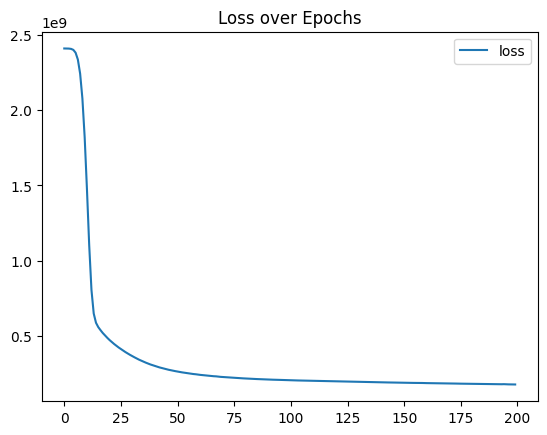

In [102]:
pd.DataFrame(demand_model.history.history).plot().set_title('Loss over Epochs')

In [103]:
training_score = demand_model.evaluate(X_train, y_train, verbose=0)
test_score = demand_model.evaluate(X_test, y_test, verbose=0)

In [104]:
training_score

178892912.0

In [105]:
test_score

139877584.0